## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

## Functions

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', test=True):
    if test: test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Load data

In [5]:
data_air = pd.read_csv("data/international-airline-passengers.csv", parse_dates=[0], index_col=0)
data_car = pd.read_csv("data/monthly-car-sales-in-quebec-1960.csv", parse_dates=[0], index_col=0)
data_sales = pd.read_csv("data/monthly-sales-of-company-x-jan-6.csv", parse_dates=[0], index_col=0)

## Data airline company passengres

c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


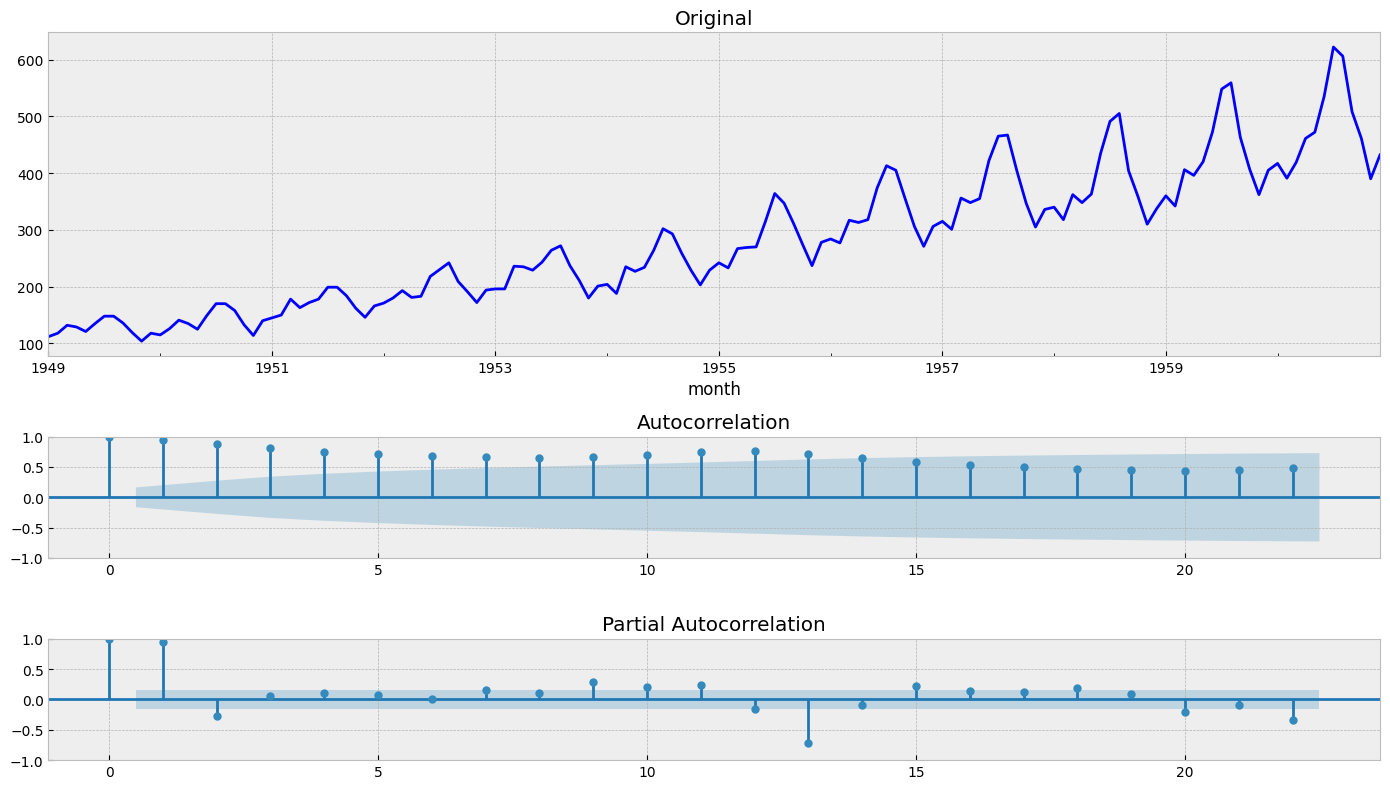

In [6]:
# Посмотрим данные по первому датасету
tsplot(data_air.passengers, test=False)

На графике выше виден тренд и сезонность. Избавимся от тренда

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


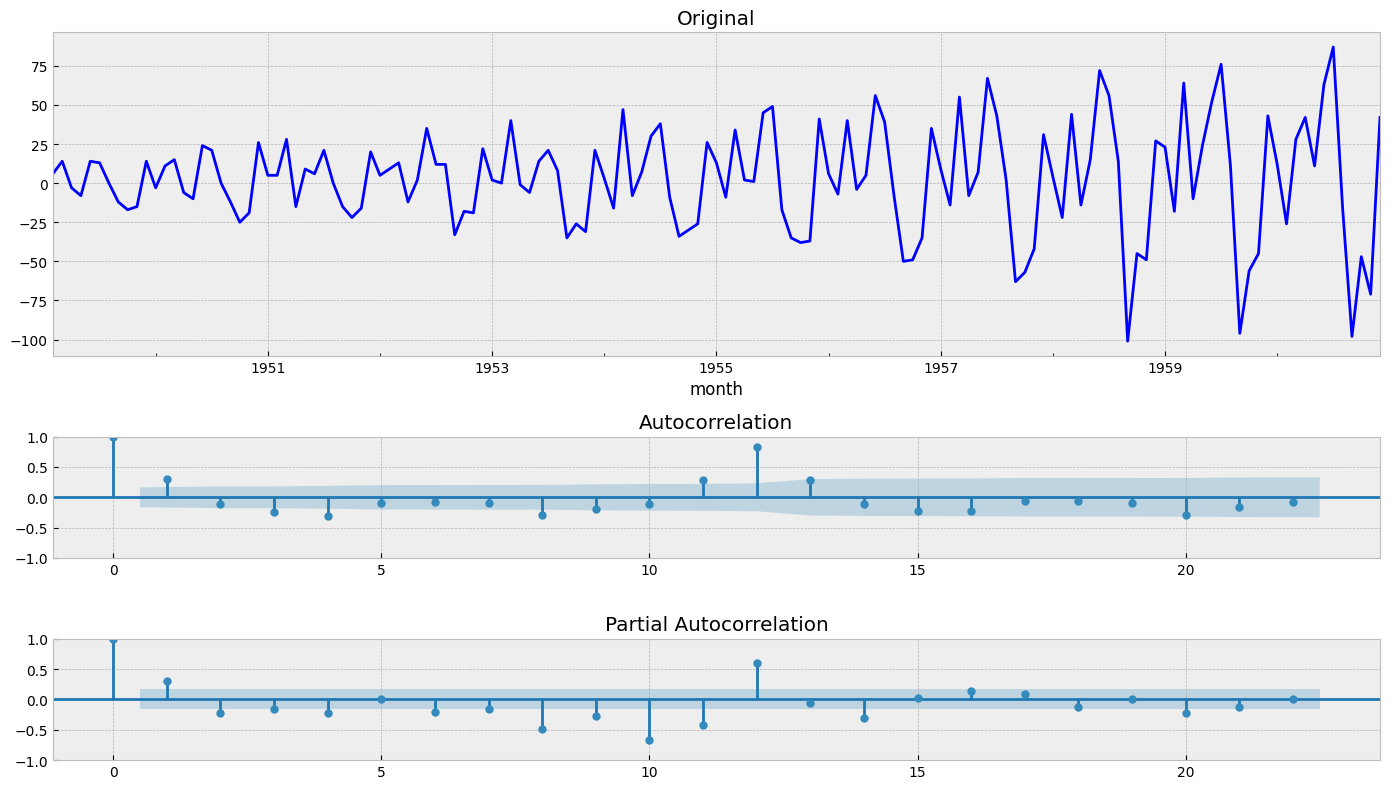

In [7]:
data_air_diff = data_air.diff(periods=1).dropna()

tsplot(data_air_diff['passengers'])

От тренда мы избавились, теперь избавимся от сезонности.
предположу, что сезонность здесь равна 12 месяцам

Results of Dickey-Fuller Test:
Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


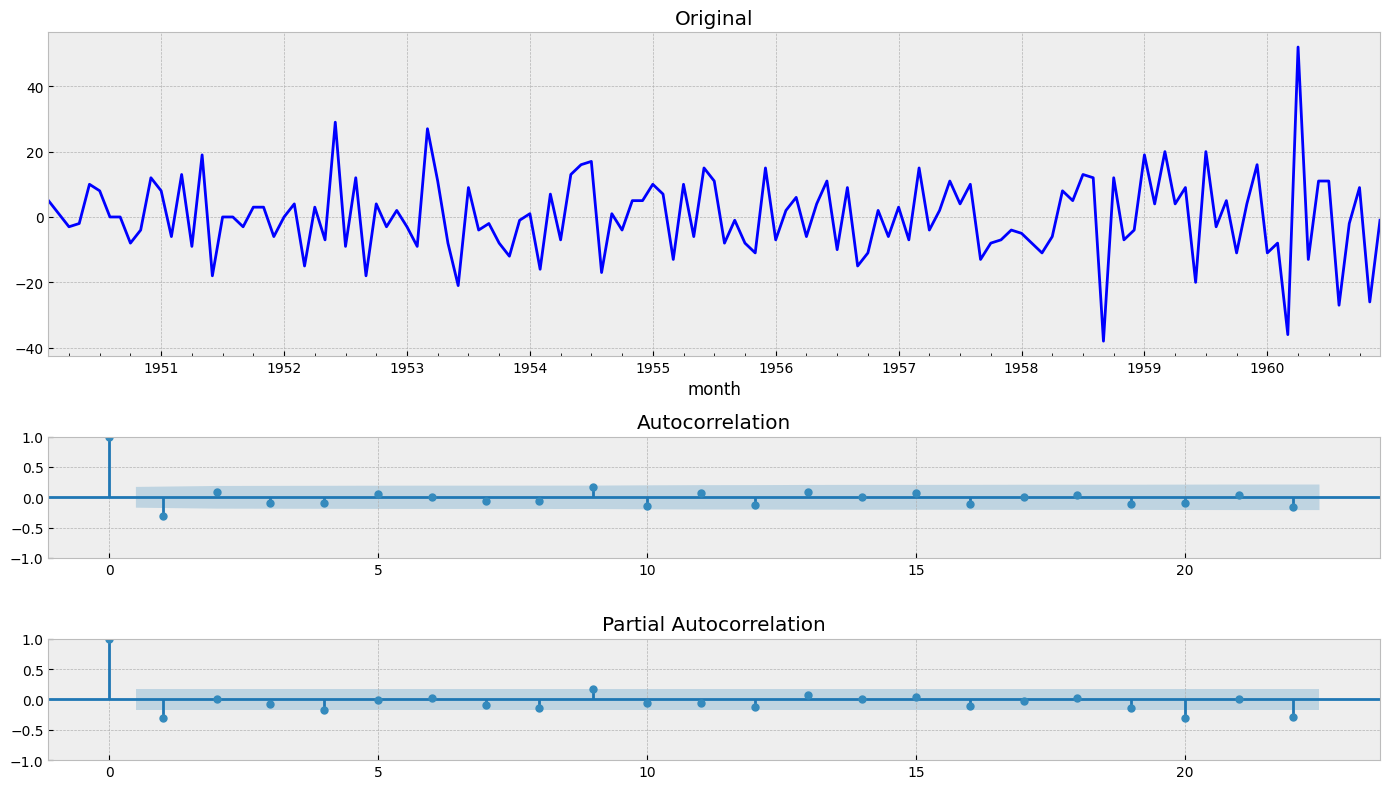

In [9]:
data_air_diff_seasonal = data_air_diff.diff(periods=12).dropna()
tsplot(data_air_diff_seasonal['passengers'])

привели данные к стационарному виду

## Car sales monthly

c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


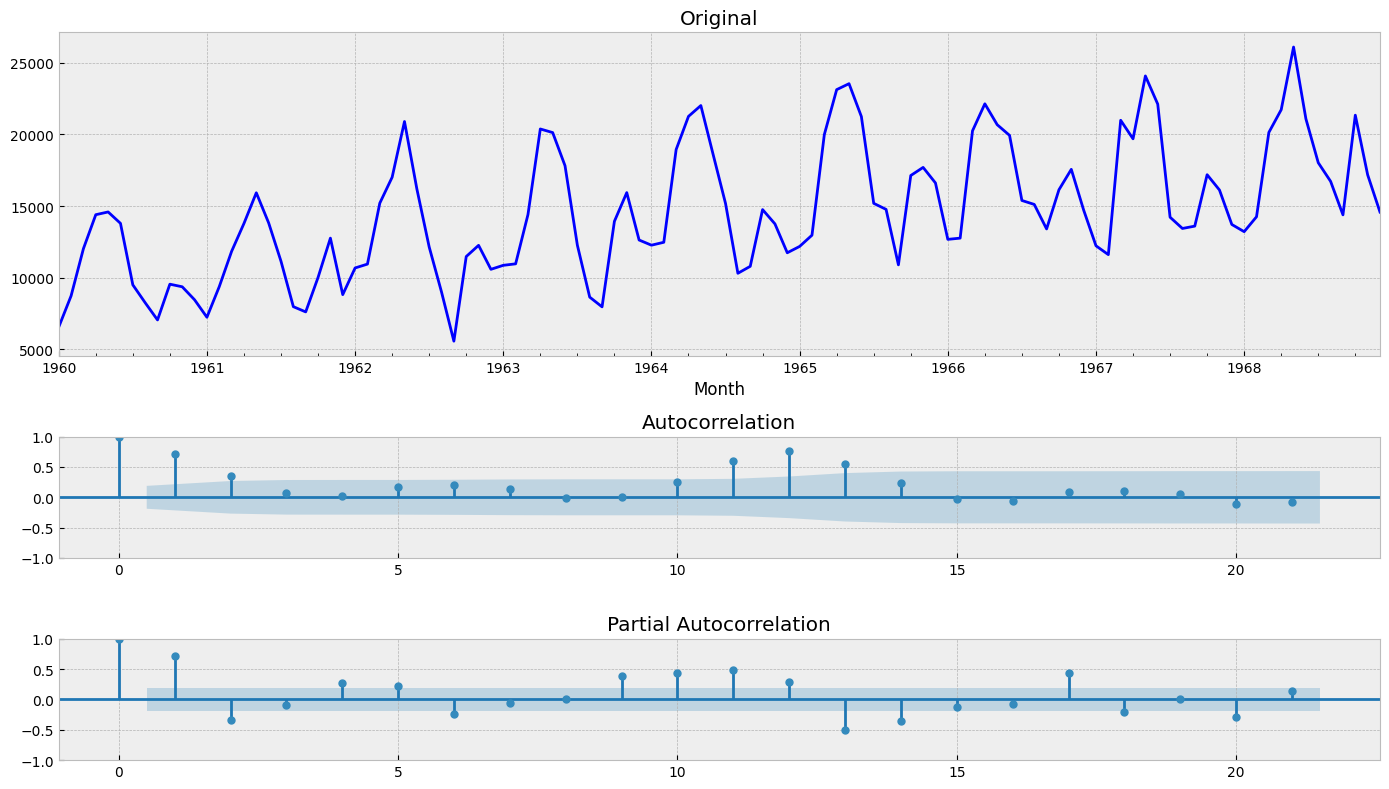

In [10]:
# Посмотрим данные по продажам машин
tsplot(data_car.Count, test=False)

На графике тут тоже виден тренд и сезонность. Избавимся от тренда и от сезонности

Results of Dickey-Fuller Test:
Test Statistic                 -3.345097
p-value                         0.012979
#Lags Used                     11.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


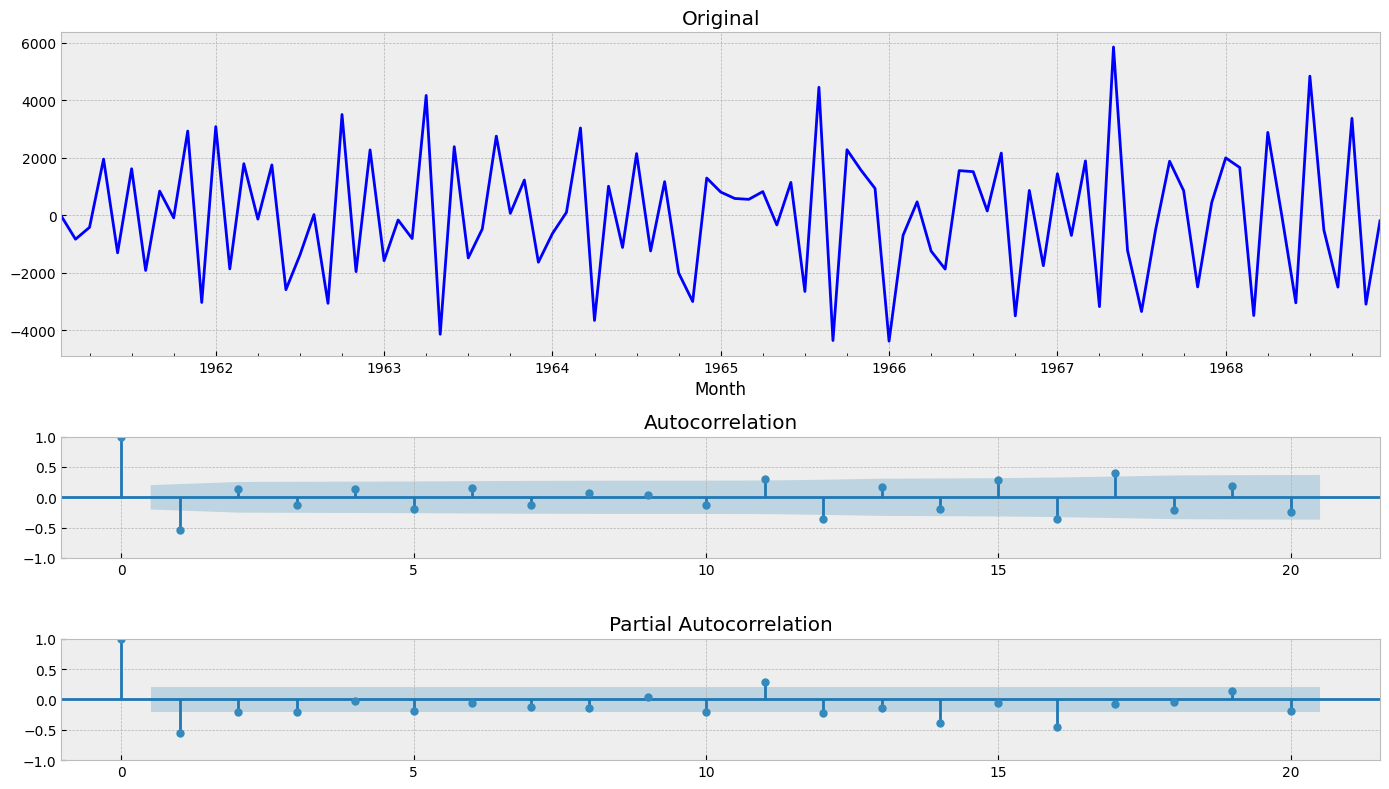

In [11]:
data_car_diff_seasonal = data_car.diff(periods=1).dropna().diff(periods=12).dropna()

tsplot(data_car_diff_seasonal['Count'])

Избавились от нестационарности

## Sales data

c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


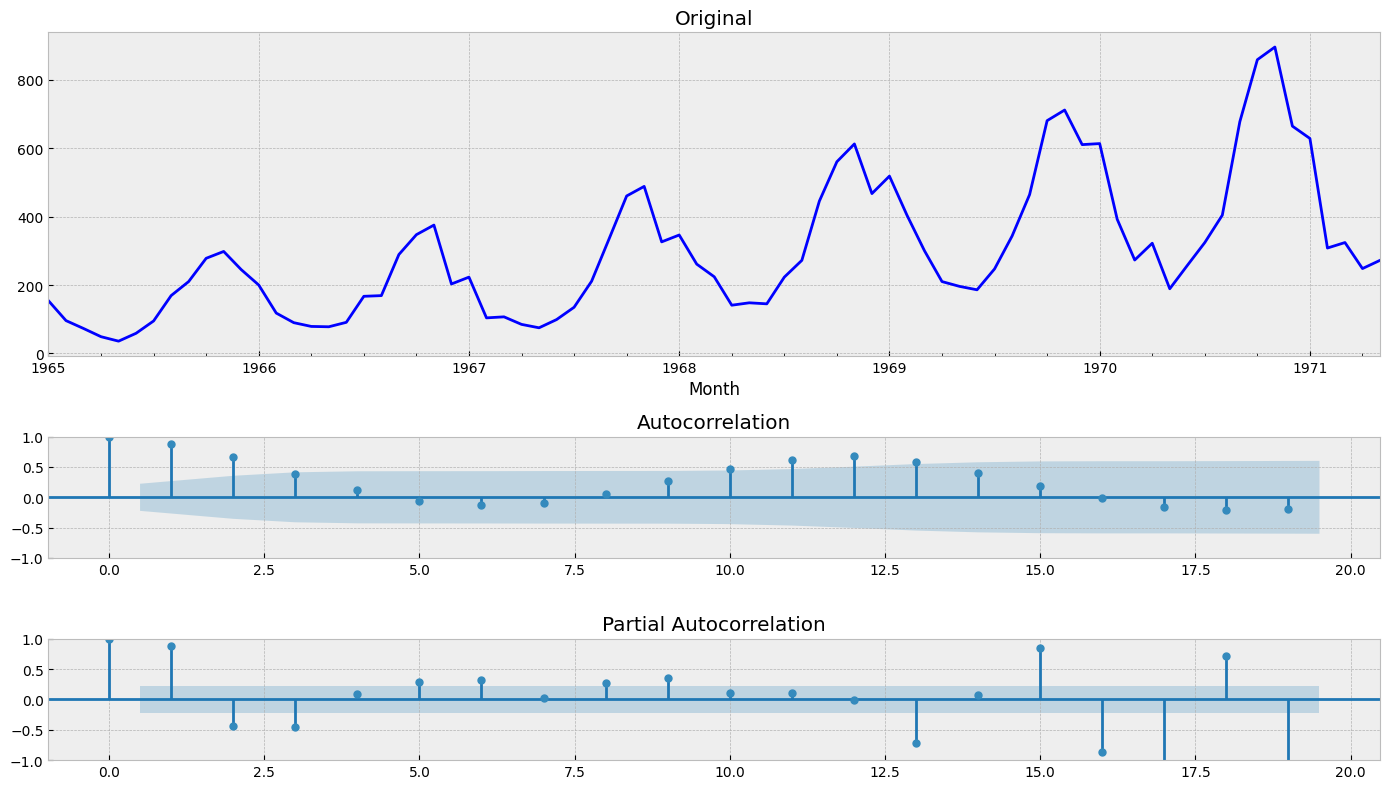

In [12]:
# Посмотрим данные по продажам
tsplot(data_sales.Count, test=False)

На графике выше точно есть сезонность и небольшой тренд. избавимся от тренда

Results of Dickey-Fuller Test:
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


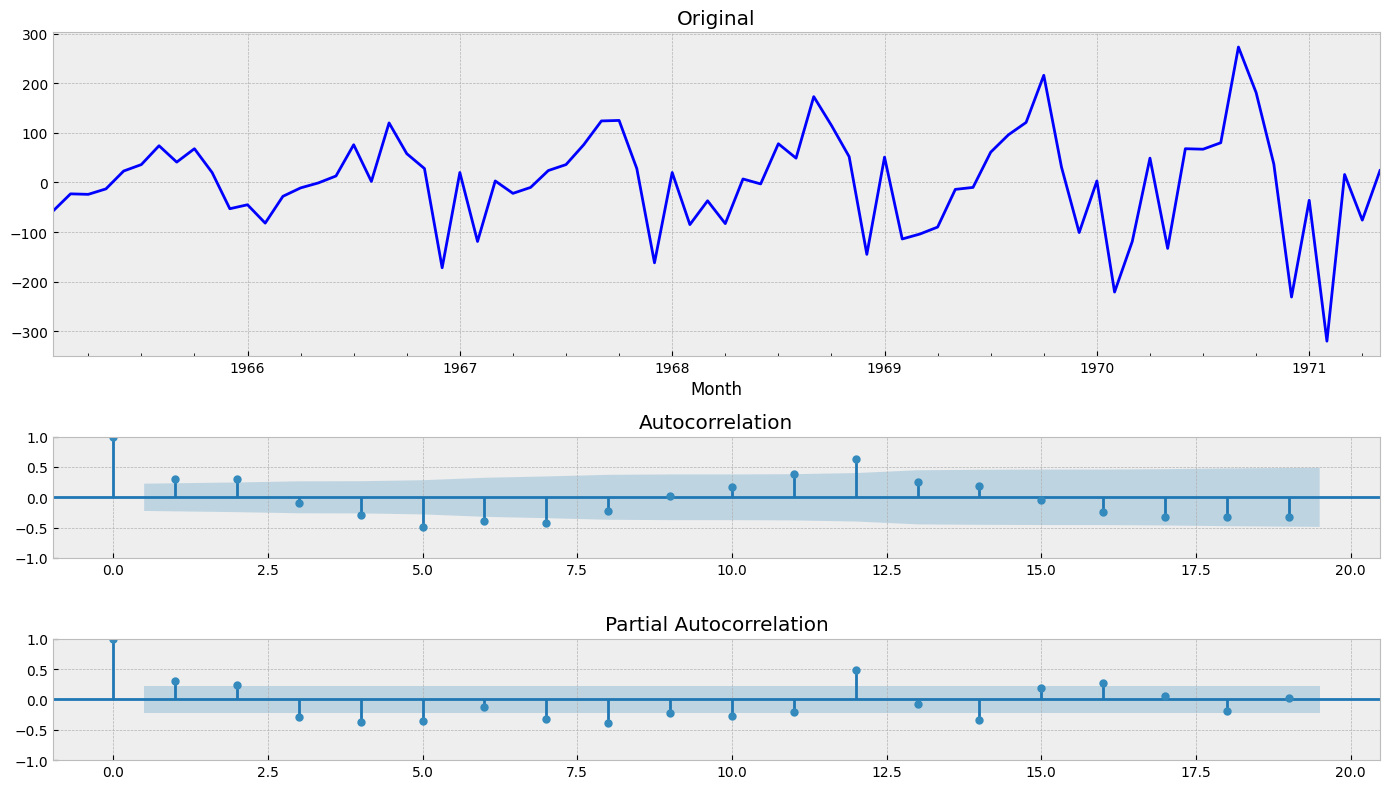

In [29]:
data_sales_diff = data_sales.diff(periods=1).dropna()

tsplot(data_sales_diff['Count'])

теперь избавимся и от сезонности

Results of Dickey-Fuller Test:
Test Statistic                 -2.633180
p-value                         0.086332
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


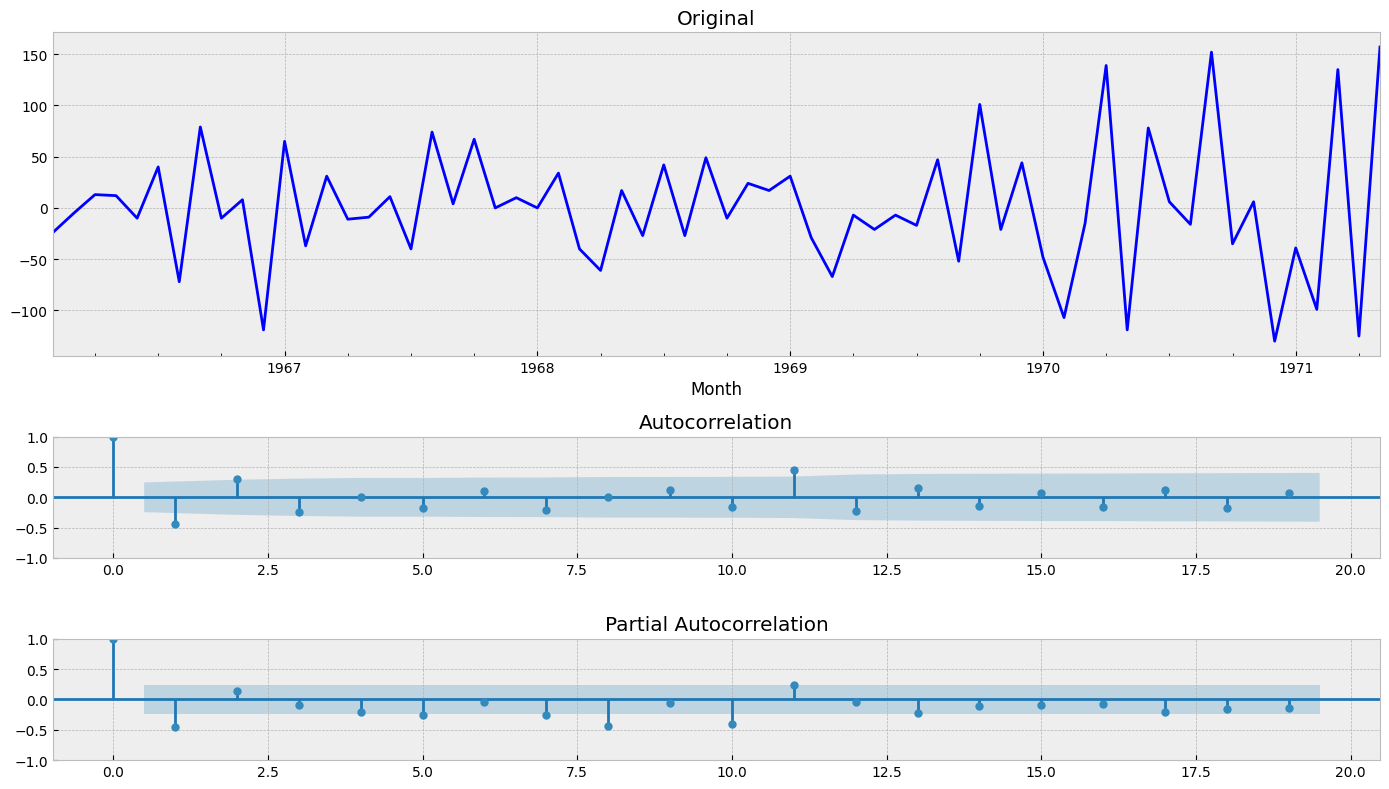

In [30]:
data_sales_diff_seasonal = data_sales_diff.diff(periods=12).dropna()
tsplot(data_sales_diff_seasonal['Count'])

Хотя и p-value здесь больше 5%, но опосредованно говоря, можно принять график за стационарный после преобразований. Попробуем добавить преобразование Бокса Кокса вначале всех преобразований.

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


c:\Users\RUEMSA\AppData\Local\Programs\Python\venv\.ml_venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


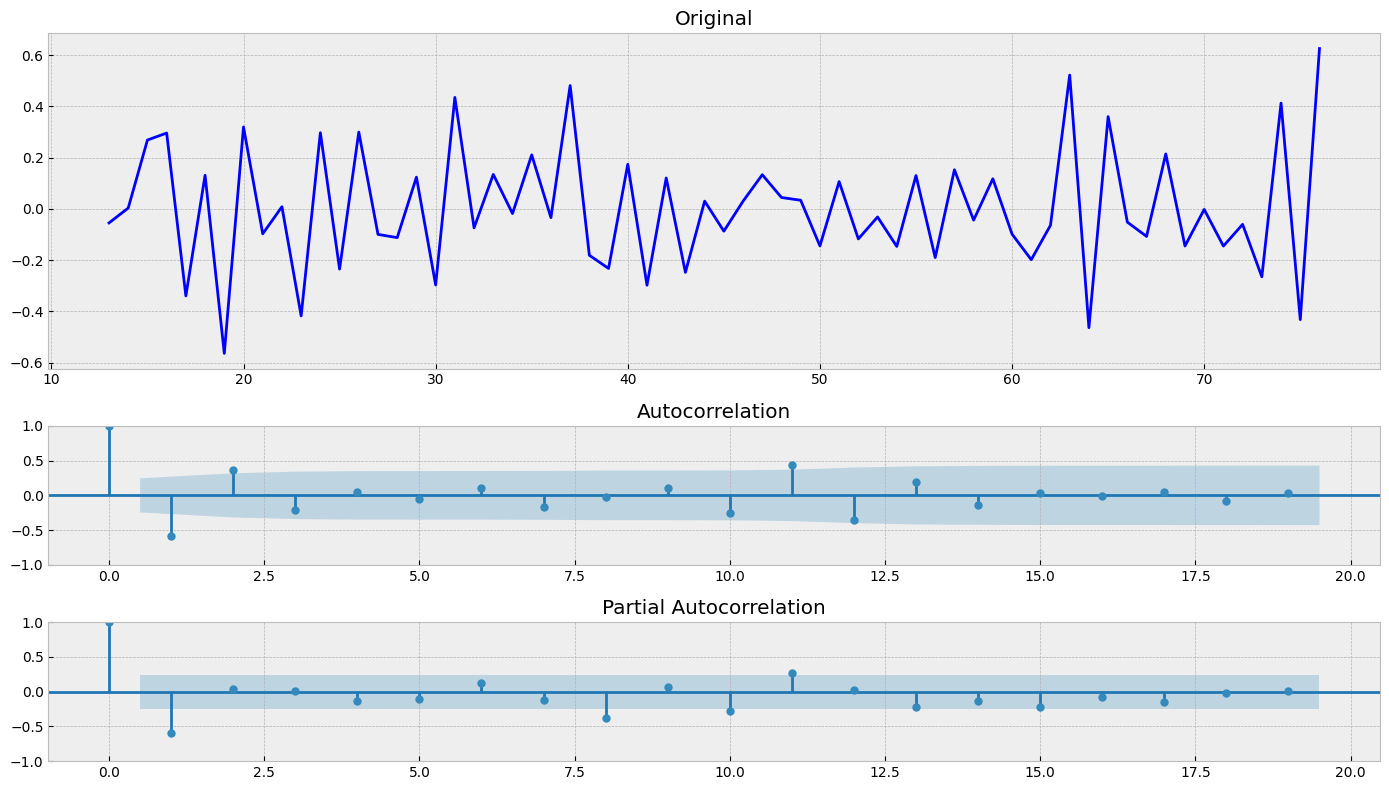

In [43]:
from scipy.stats import boxcox

tsplot(pd.DataFrame(boxcox(data_sales.Count,0)).diff(periods=1).dropna().diff(periods=12).dropna()[0])Ы

результат стал только хуже.
